Univariate SARIMAX forecasting practice 
Datasets used
    Nuitées dans l'hôtellerie - Total - Pays de la Loire https://www.insee.fr/fr/statistiques/serie/001711049

In [4]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pyramid
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
dn = pd.read_csv('datasets/valeurs_mensuelles.csv', sep=";", names=["Date","Nights"],index_col=[0], parse_dates=[0],usecols=[0, 1],skiprows=range(0, 3),header=None)
dn.head()

,Nights
Date,
2018-06-01,772.50
2018-05-01,691.32
2018-04-01,640.27
2018-03-01,519.03
2018-02-01,447.08


<Figure size 432x288 with 0 Axes>

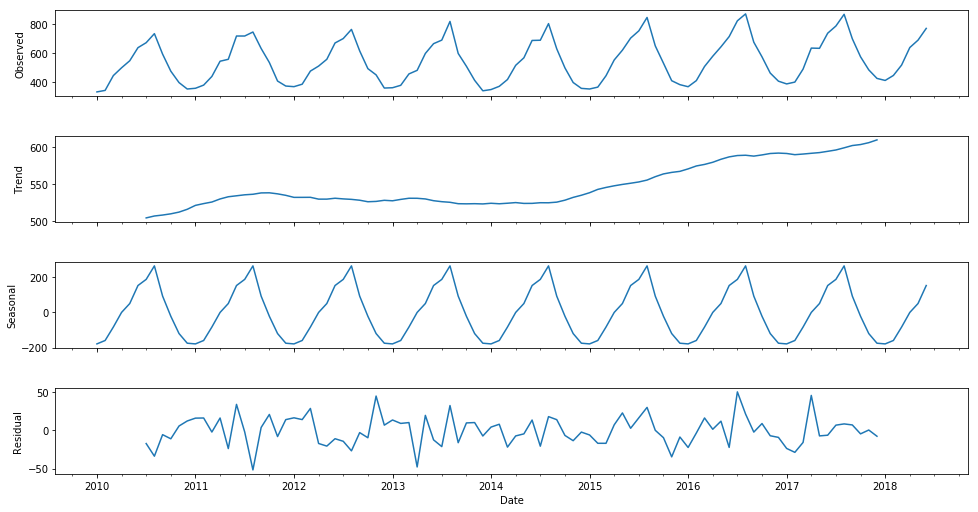

In [5]:
decomposition = seasonal_decompose(dn.Nights, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [6]:
from pyramid.arima import auto_arima
y = np.array(dn.Nights)
tc_fit = auto_arima(y, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True, n_jobs=-1, d=1, D=1, trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=False, random=True, random_state=42,  # we can fit a random search (not exhaustive)
                    n_fits=25)

tc_fit.summary()

Fit ARIMA: order=(3, 1, 3) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=873.130, BIC=880.596, Fit time=1.050 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=831.881, BIC=849.301, Fit time=7.469 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=831.247, BIC=851.156, Fit time=8.476 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=829.718, BIC=842.161, Fit time=2.157 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  102
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -409.859
Date:                            Tue, 14 Aug 2018   AIC                            829.718
Time:                                    10:06:48   BIC                            842.161
Sample:                                         0   HQIC                           834.734
                                            - 102                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1950      0.530      0.368      0.713      -0.844       1.234
ar.L1         -0.1998      0.157     -1.270      0.204      -0.508       0.109
ma.L1         -0.6580      0.124     -5.315      0.000      -0.901      -0.415
ma.S.L12      -0.4861      0.104     -4.684      0.000      -0.689      -0.283
sigma2       559.0580     96.809      5.775      0.000     369.315     748.801
===================================================================================
Ljung-Box (Q):                       42.93   Jarque-Bera (JB):                 0.93
Prob(Q):                              0.35   Prob(JB):                         0.63
Heteroskedasticity (H):               1.48   Skew:                            -0.17
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
dftrain = dn[(dn.index>='2010-01-01')&(dn.index<'2017-01-01')]
train_nights  = np.array(dftrain.Nights)

dftest = dn[(dn.index>='2017-01-01')&(dn.index<'2018-01-01')]
test_nights = np.array(dftest.Nights)

In [10]:
tc_fit.fit(train_nights)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [11]:
tc_future_forecast = tc_fit.predict(n_periods=12)

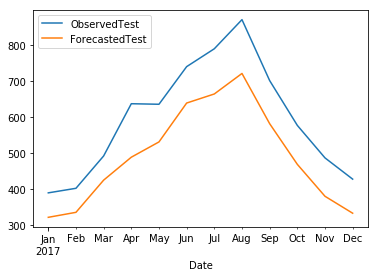

In [12]:
tc_dff = pd.DataFrame(tc_future_forecast, index = dftest.index)
pd.concat([dftest.Nights,tc_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTest')
L.get_texts()[1].set_text('ForecastedTest')

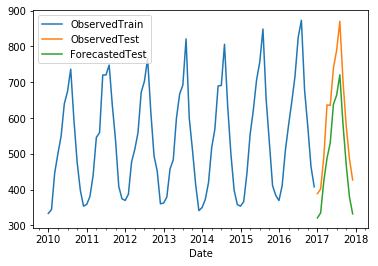

In [13]:
pd.concat([dftrain.Nights,dftest.Nights,tc_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTrain')
L.get_texts()[1].set_text('ObservedTest')
L.get_texts()[2].set_text('ForecastedTest')
plt.show()

In [7]:
#N_ = data_nights[(data_nights.index>='2016-01-01')]
stepwise_model = auto_arima(np.array(dn.Nights), start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

stepwise_model.summary()


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=873.130, BIC=880.596, Fit time=0.473 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=899.012, BIC=903.989, Fit time=0.051 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=851.066, BIC=861.020, Fit time=0.545 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=829.307, BIC=839.262, Fit time=0.408 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=830.318, BIC=842.761, Fit time=0.986 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=844.781, BIC=852.247, Fit time=0.166 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=829.718, BIC=842.161, Fit time=0.554 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=829.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  102
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -410.654
Date:                            Tue, 14 Aug 2018   AIC                            829.307
Time:                                    10:07:25   BIC                            839.262
Sample:                                         0   HQIC                           833.320
                                            - 102                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1634      0.350      0.467      0.640      -0.522       0.849
ma.L1         -0.7637      0.075    -10.197      0.000      -0.910      -0.617
ma.S.L12      -0.5355      0.099     -5.386      0.000      -0.730      -0.341
sigma2       563.5869     99.165      5.683      0.000     369.228     757.946
===================================================================================
Ljung-Box (Q):                       45.52   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.25   Prob(JB):                         0.60
Heteroskedasticity (H):               1.57   Skew:                            -0.12
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
stepwise_model.fit(train_nights)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [15]:
sw_future_forecast = stepwise_model.predict(n_periods=12)

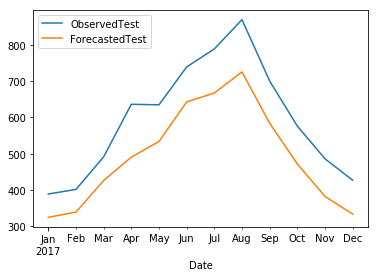

In [16]:
sw_dff = pd.DataFrame(sw_future_forecast, index = dftest.index)
pd.concat([dftest.Nights,sw_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTest')
L.get_texts()[1].set_text('ForecastedTest')

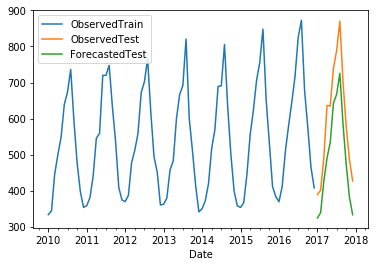

In [17]:
pd.concat([dftrain.Nights,dftest.Nights,sw_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTrain')
L.get_texts()[1].set_text('ObservedTest')
L.get_texts()[2].set_text('ForecastedTest')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt
def MASE(testing_series, prediction_series):
    n = testing_series.shape[0]
    scalingFactor = prediction_series.mean()
    errors = testing_series - prediction_series
    scaledErrors = errors/(np.sum(np.abs(testing_series - scalingFactor)) / n)
    return np.abs(scaledErrors).mean()

In [19]:
mae = mean_absolute_error(test_nights, tc_future_forecast)
print('MAE: %f' % mae)
mse = mean_squared_error(test_nights, tc_future_forecast)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mase = MASE(np.array(test_nights),tc_future_forecast)
print('MASE: %f' % mase)

MAE: 105.087066
MSE: 11787.059394
RMSE: 108.568225
MASE: 0.710268


In [20]:
mae = mean_absolute_error(test_nights, sw_future_forecast)
print('MAE: %f' % mae)
mse = mean_squared_error(test_nights, sw_future_forecast)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mase = MASE(np.array(test_nights),sw_future_forecast)
print('MASE: %f' % mase)

MAE: 101.683182
MSE: 11070.028232
RMSE: 105.214202
MASE: 0.690876
